# <u>Advance House Price Prediction Model</u>
**<u>Data Source -<u>** https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data<br>

## <u>Testing Data</u>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import rcParams

%matplotlib inline
rcParams["figure.figsize"] = 6,6
pd.pandas.set_option("display.max_columns", None)

In [2]:
x_test = pd.read_csv("x_test.csv")
print("There are {} rows & {} columns in variable data.".format(x_test.shape[0], x_test.shape[1]))
x_test.head()

There are 1459 rows & 80 columns in variable data.


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [3]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [4]:
y_test = pd.read_csv("y_test.csv")
print("There are {} rows & {} columns in variable data.".format(y_test.shape[0], y_test.shape[1]))
y_test.head()

There are 1459 rows & 2 columns in variable data.


,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [5]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


In [6]:
data = pd.concat([x_test, y_test["SalePrice"]], axis=1)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.052498
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.393989
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.683570
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.477511
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.079977


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

## Data Analyzing -
1. Missing Values
2. All the Numerical Variables
3. Distribution of the Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between Dependent & Independent Features (Sale Price)

In [8]:
## Here we will check the percentage of nan values present in each feature
# 1 -step make the list of features which has missing values
features_with_nan = [features for features in data.columns if data[features].isnull().sum() >= 1]

# 2- step print the feature name and the percentage of missing values
for feature in features_with_nan:
    print("Missing Values in", feature, " - ", np.round(data[feature].isnull().mean()*100, 2), "%")

Missing Values in MSZoning  -  0.27 %
Missing Values in LotFrontage  -  15.56 %
Missing Values in Alley  -  92.67 %
Missing Values in Utilities  -  0.14 %
Missing Values in Exterior1st  -  0.07 %
Missing Values in Exterior2nd  -  0.07 %
Missing Values in MasVnrType  -  1.1 %
Missing Values in MasVnrArea  -  1.03 %
Missing Values in BsmtQual  -  3.02 %
Missing Values in BsmtCond  -  3.08 %
Missing Values in BsmtExposure  -  3.02 %
Missing Values in BsmtFinType1  -  2.88 %
Missing Values in BsmtFinSF1  -  0.07 %
Missing Values in BsmtFinType2  -  2.88 %
Missing Values in BsmtFinSF2  -  0.07 %
Missing Values in BsmtUnfSF  -  0.07 %
Missing Values in TotalBsmtSF  -  0.07 %
Missing Values in BsmtFullBath  -  0.14 %
Missing Values in BsmtHalfBath  -  0.14 %
Missing Values in KitchenQual  -  0.07 %
Missing Values in Functional  -  0.14 %
Missing Values in FireplaceQu  -  50.03 %
Missing Values in GarageType  -  5.21 %
Missing Values in GarageYrBlt  -  5.35 %
Missing Values in GarageFinish  - 

>**As there are many missing values, we need to find the relationship between Missing Values & in Sale Price.**

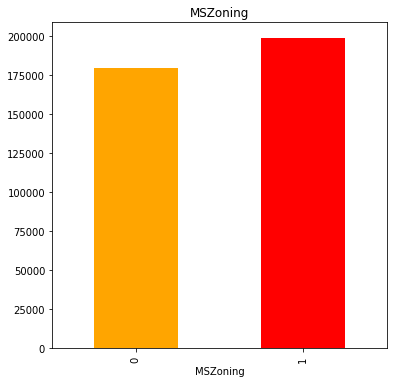

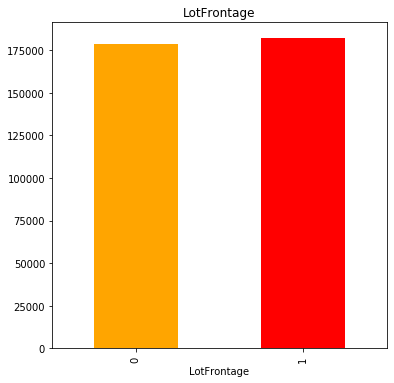

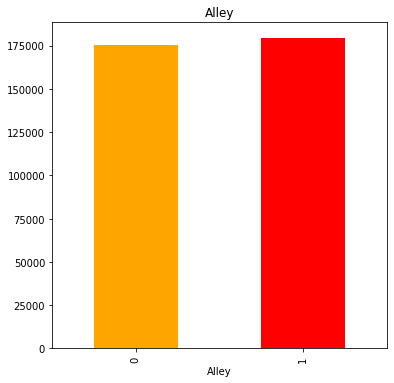

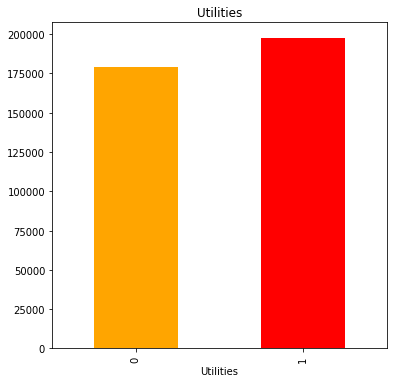

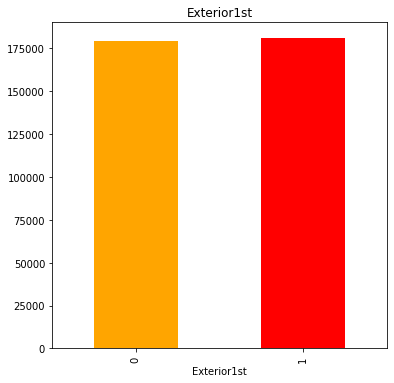

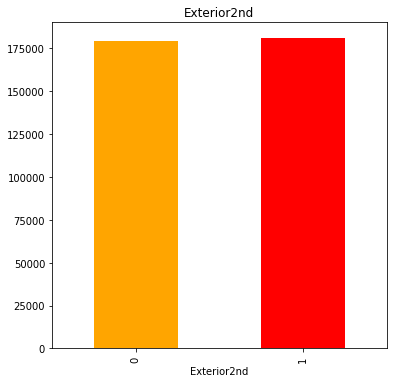

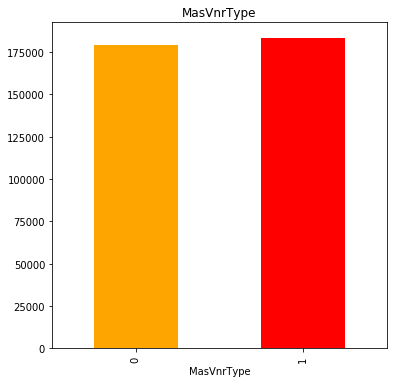

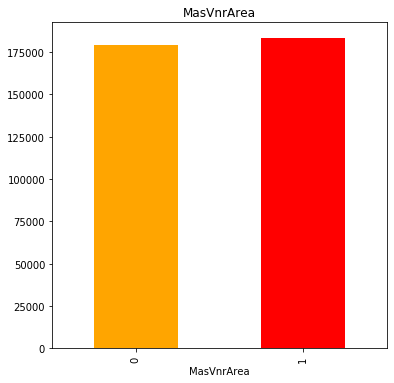

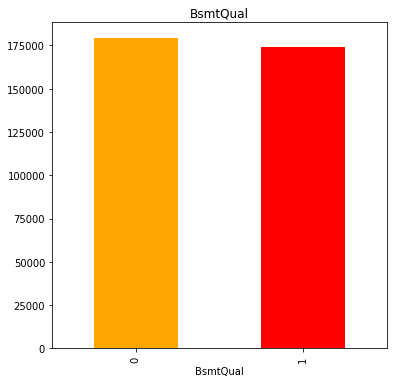

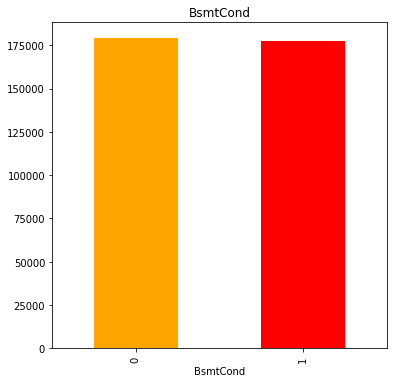

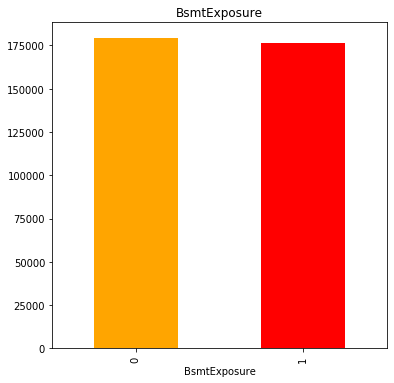

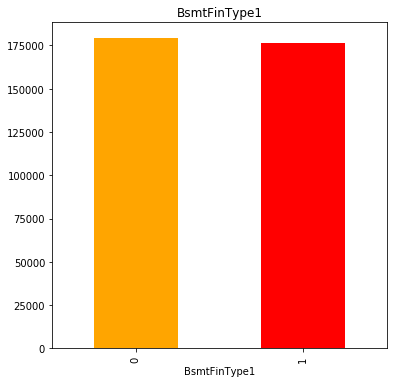

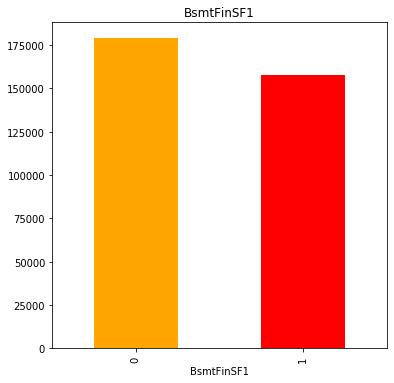

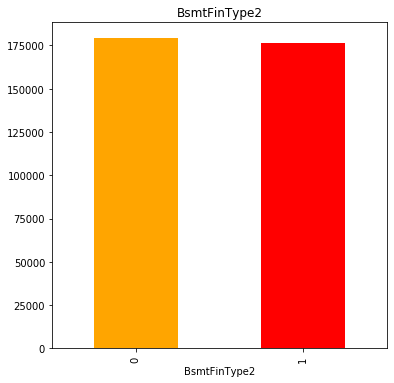

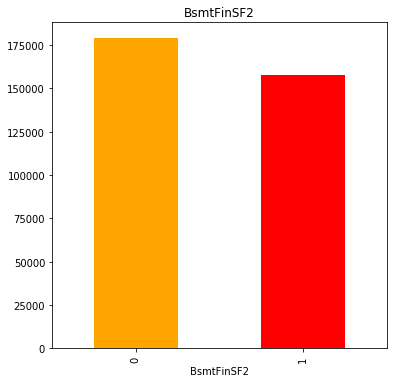

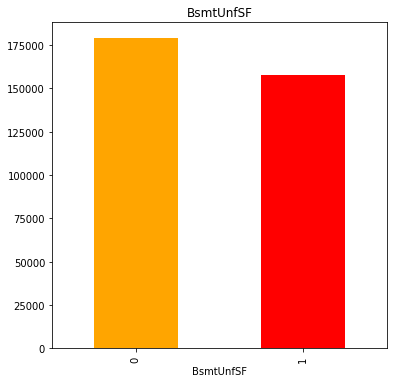

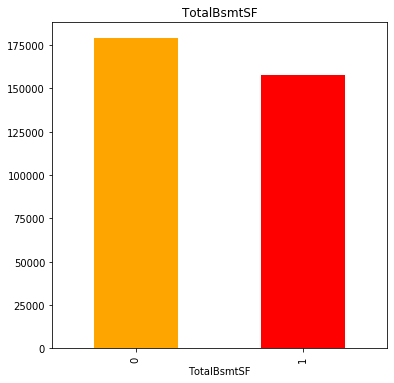

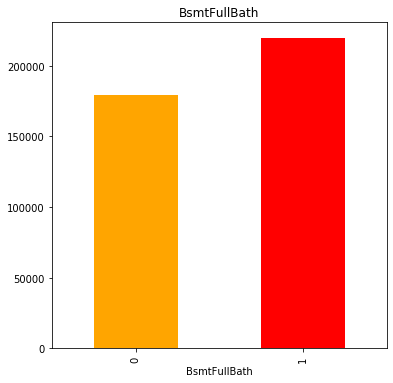

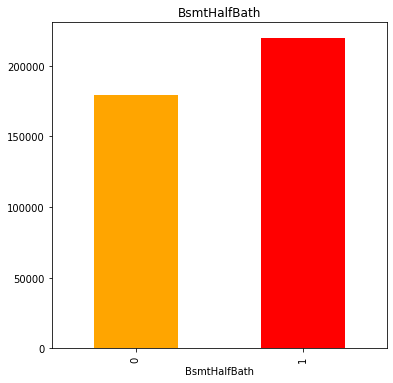

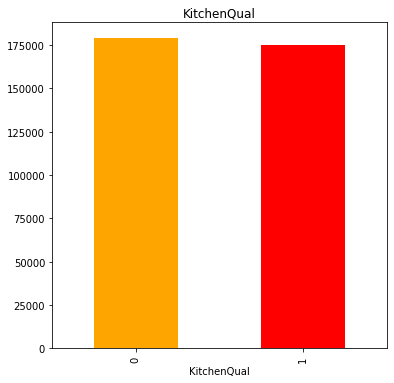

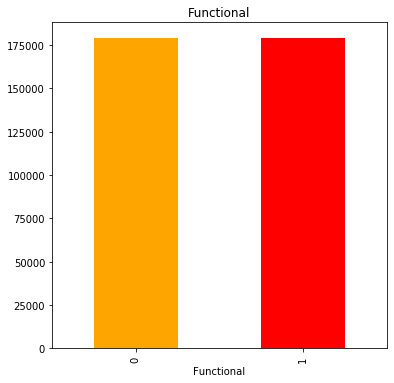

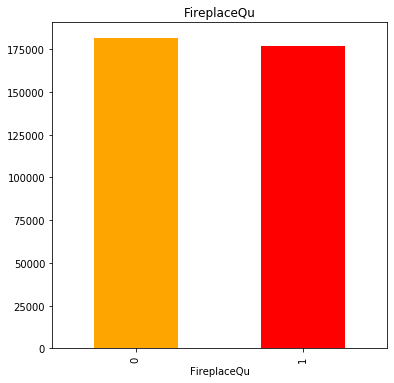

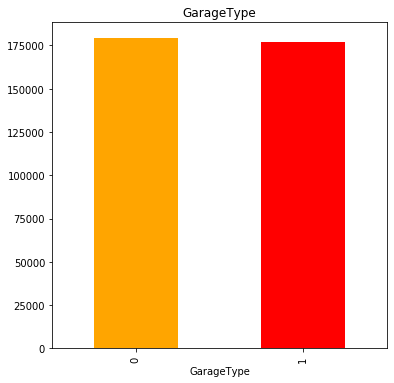

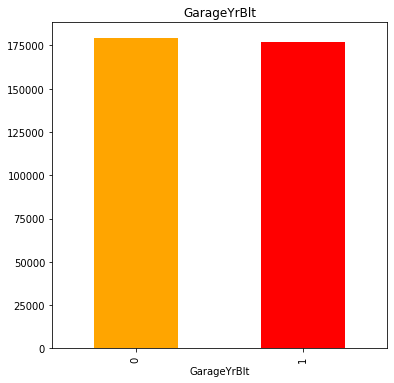

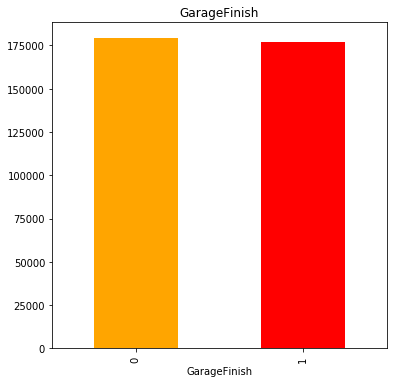

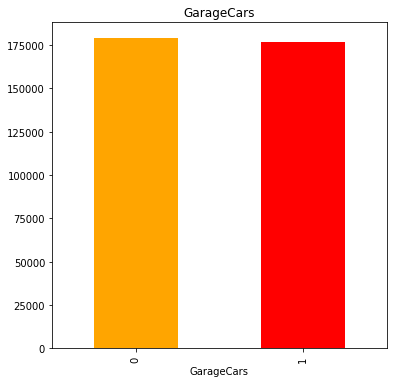

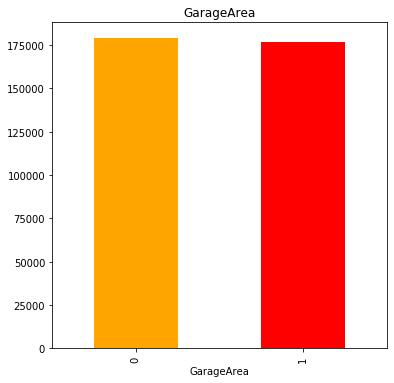

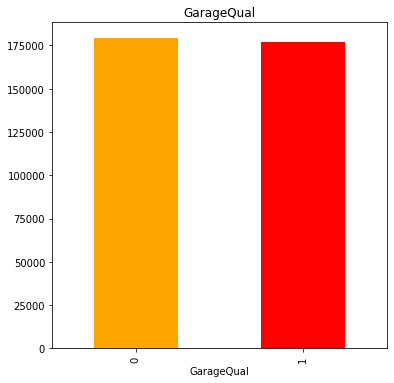

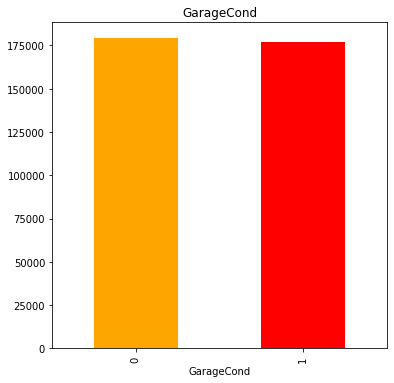

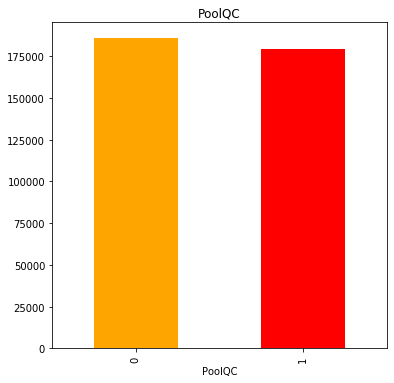

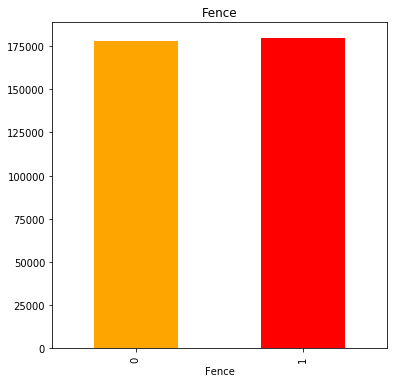

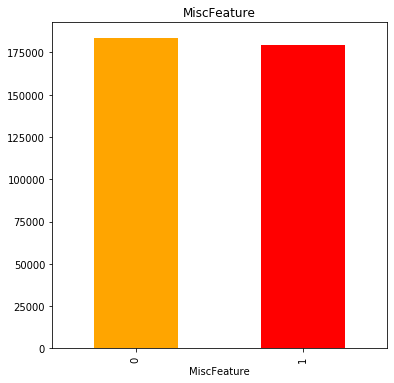

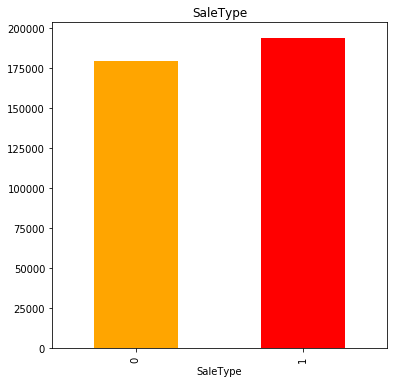

In [9]:
for feature in features_with_nan:
    data_copy = data.copy()
    
    # let's make a variable that indicates 1 if the observation is missing or zero otherwise.
    data_copy[feature] = np.where(data_copy[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present.
    data_copy.groupby(feature)['SalePrice'].median().plot.bar(color=["orange","red"])
    plt.title(feature)
    plt.show()

>Here as the relation between the missing values and the dependent variable is clearly visible. So, we need to replace these NaN values with something meaningful which we will do in the Feature Engineering section.

From the above dataset we can see that the ID feature is not required.

In [10]:
print("Id of Houses :- {}".format(len(data.Id)))

Id of Houses :- 1459


## Numerical Variables

In [11]:
num_features = [feature for feature in data.columns if data[feature].dtypes != "O"]

print("Number of Numerical Features are :-", len(num_features))

data[num_features].head()

Number of Numerical Features are :- 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,169277.052498
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,187758.393989
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010,183583.683570
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,1998.0,2.0,470.0,360,36,0,0,0,0,0,6,2010,179317.477511
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,1992.0,2.0,506.0,0,82,0,0,144,0,0,1,2010,150730.079977


>**Temporal Variables (Eg: Datetime Variables)**<br>
From the Dataset we have some year variables. We have extract information from the datetime variables like no. of years or no. of days. One example in this specific scenario can be difference in years between the year the house was built and the year the house was sold.

In [12]:
yr_features = [feature for feature in num_features if "Year" in feature or "Yr" in feature]
print("Year Features -", yr_features)

Year Features - ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


Let's see it's unique values

In [13]:
for feature in yr_features:
    print(feature, " :-\n", data[feature].unique(), "\n")

YearBuilt  :-
 [1961 1958 1997 1998 1992 1993 1990 1970 1999 1971 1975 2009 2005 2003
 2002 2006 2004 1920 1974 2000 2010 1967 1978 1966 1964 1962 1952 1949
 1959 1956 1955 1948 1960 1963 1900 1957 1938 1923 1890 1910 1922 1950
 1925 1939 1940 1942 1936 1930 1915 1912 1917 1907 1968 1977 1927 1947
 1954 1987 1996 1972 1945 1924 1931 1941 1994 1989 1921 1896 1976 2008
 1965 1973 1984 1985 1991 1969 1995 1980 2007 1986 1981 1951 1953 1935
 1902 1946 1934 1983 1880 1979 2001 1916 1918 1988 1937 1905 1928 1926
 1929 1914 1895 1982 1879 1901 1919 1932] 

YearRemodAdd  :-
 [1961 1958 1998 1992 1994 2007 1990 1970 1999 1971 1975 2010 2005 2006
 2004 2002 1950 1993 2000 2003 1967 1978 1966 1964 2001 2008 2009 1959
 1956 1952 1955 1960 1984 1954 1957 1962 1997 1980 1968 1987 1979 1996
 1972 1985 1991 1989 1977 1976 1973 1986 1969 1995 1974 1981 1965 1951
 1953 1963 1982 1988 1983] 

GarageYrBlt  :-
 [1961. 1958. 1997. 1998. 1992. 1993. 1990. 1970. 1999. 1971. 1975. 2009.
 2005. 2003. 2002. 2006

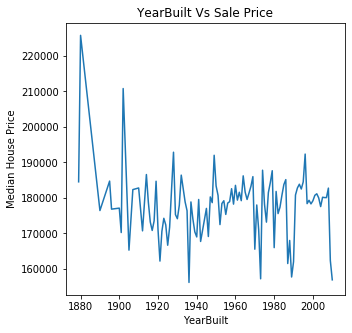

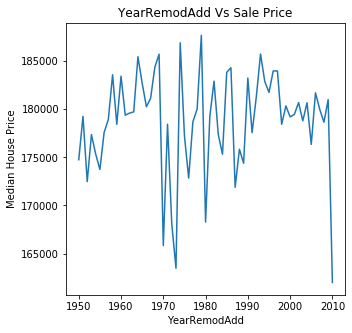

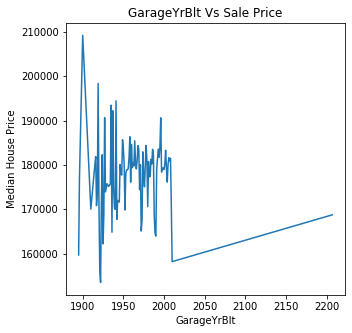

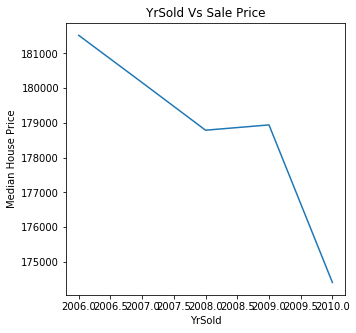

In [14]:
for feature in yr_features:
    fig = plt.figure(figsize=(5,5))
    data.groupby(feature)['SalePrice'].median().plot()
    plt.xlabel(feature)
    plt.ylabel('Median House Price')
    plt.title("{} Vs Sale Price".format(feature))

Now, will see all year features difference with sale price

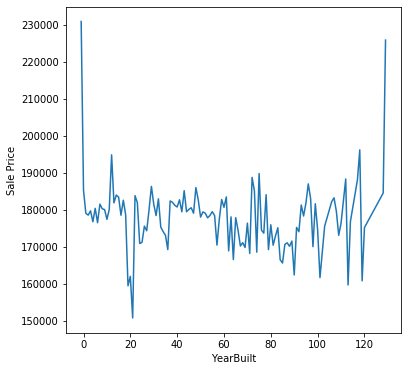

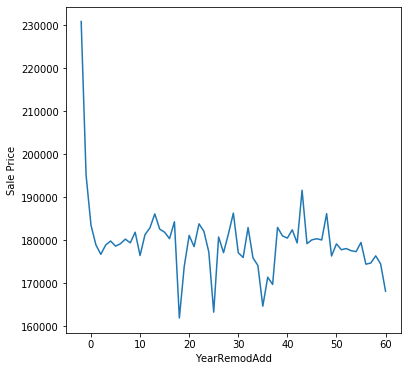

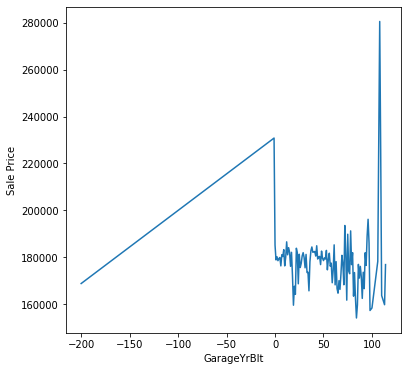

In [15]:
for feature in yr_features:
    if feature != "YrSold":
        data_copy = data.copy()
        data_copy[feature] = data_copy["YrSold"] - data_copy[feature]
        
        fig = plt.figure(figsize=(6,6))
        data_copy.groupby(feature)['SalePrice'].median().plot()
        plt.xlabel(feature)
        plt.ylabel("Sale Price")
        plt.show()

There are two kinds of numerical features :-<br>
**1.** Discreate Features - The ones which have limited unique values & are doesn't contain any Year values.<br>
**2.** Continuous Features - The ones which have high unique values & also doesn't contain any Year values.

**Discreate Features**

In [16]:
discreate_features = [feature for feature in num_features if len(data[feature].unique()) < 25 and feature not in yr_features + ["Id"]]
print("There are {} Discreate Features".format(len(discreate_features)))
discreate_features

There are 16 Discreate Features


['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MoSold']

In [17]:
data[discreate_features].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MoSold
0,20,5,6,0,0.0,0.0,1,0,2,1,5,0,1.0,0,0,6
1,20,6,6,0,0.0,0.0,1,1,3,1,6,0,1.0,0,0,6
2,60,5,5,0,0.0,0.0,2,1,3,1,6,1,2.0,0,0,3
3,60,6,6,0,0.0,0.0,2,1,3,1,7,1,2.0,0,0,6
4,120,8,5,0,0.0,0.0,2,0,2,1,5,0,2.0,0,0,1


In Discreate Features we try to gather the information regarding the relationship of each feature with the output feature i.e. SalePrice.

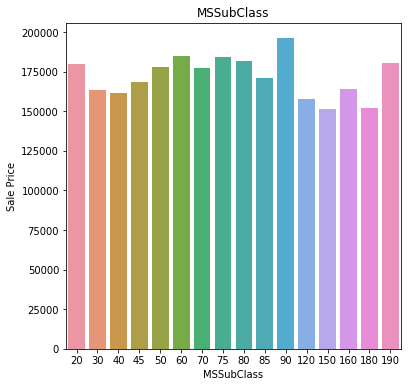

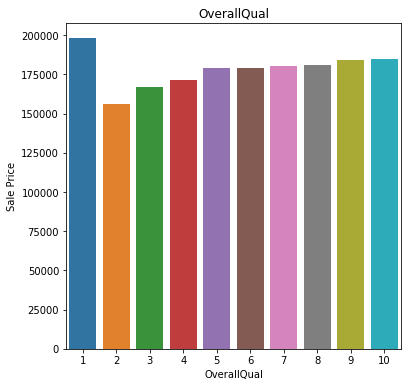

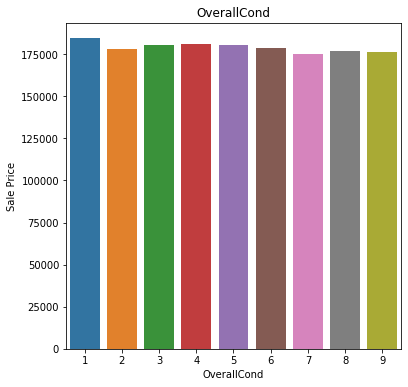

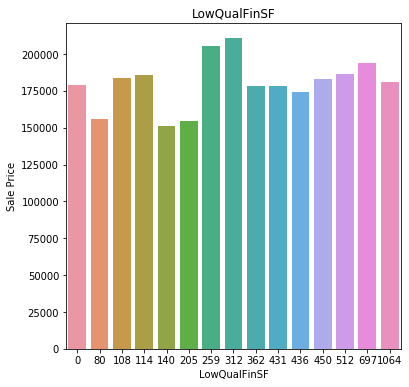

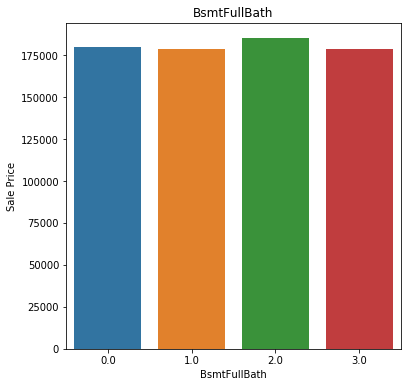

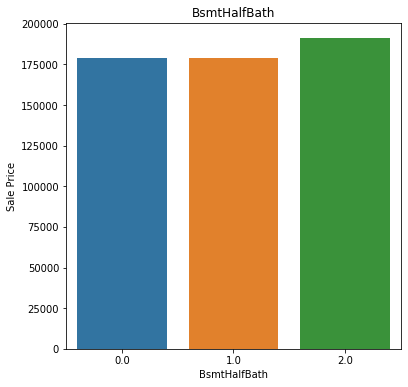

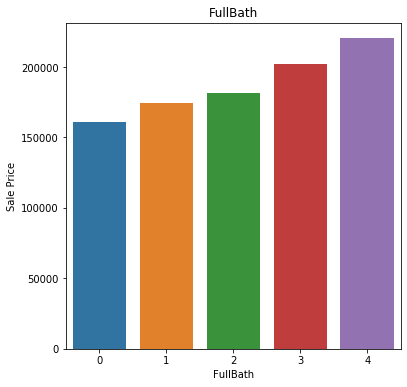

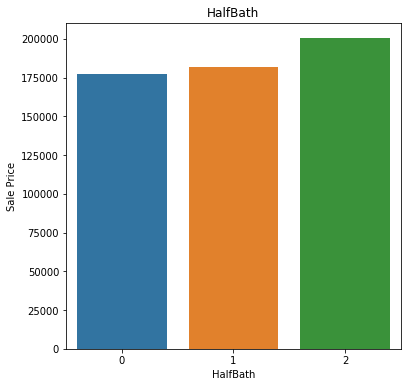

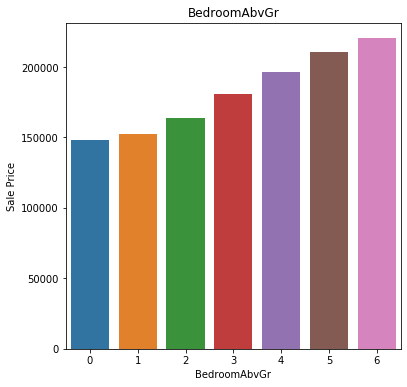

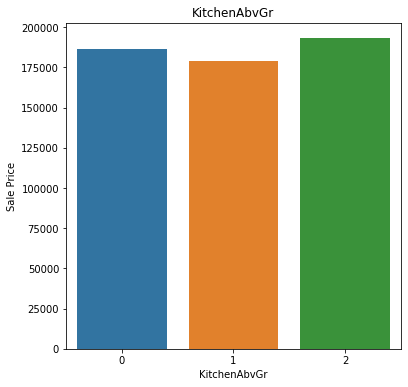

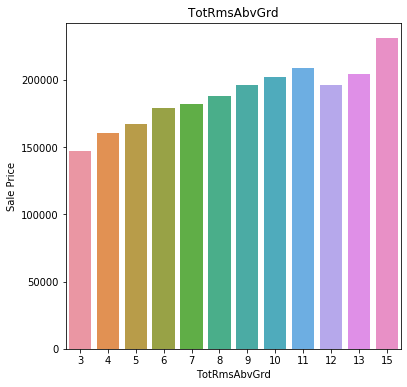

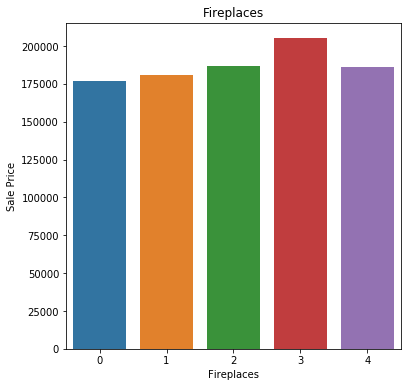

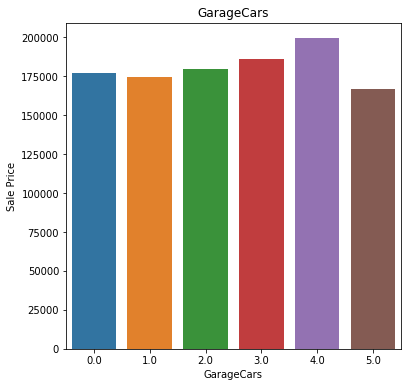

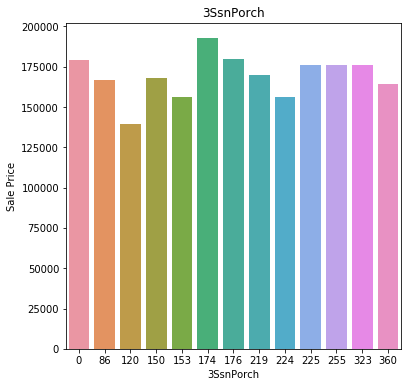

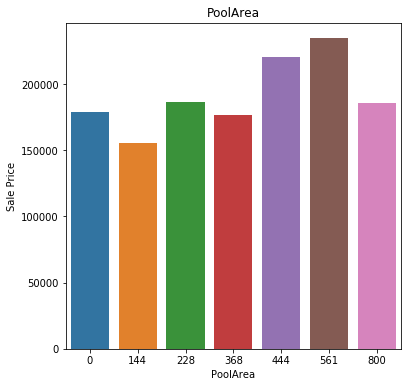

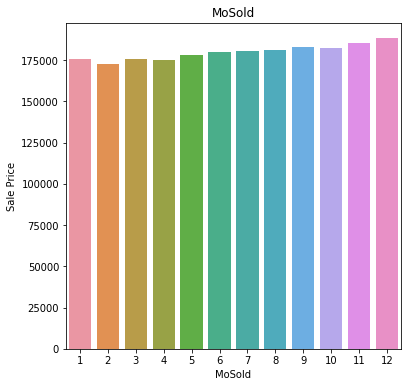

In [18]:
for feature in discreate_features:
    data_copy = data.copy()
    median = data_copy.groupby(feature)["SalePrice"].median()
    sns.barplot(x=median.index, y=median.values)
    plt.ylabel("Sale Price")
    plt.title(feature)
    plt.show()

**Continuous Features**

In [19]:
continuous_features = [feature for feature in num_features if feature not in discreate_features+ yr_features + ["Id"]]
print("There are {} Continuous Features".format(len(continuous_features)))
continuous_features

There are 17 Continuous Features


['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

In Continuous Features we try to gather information regarding its Distribution i.e. whether it is normally distributed or is it skewed.

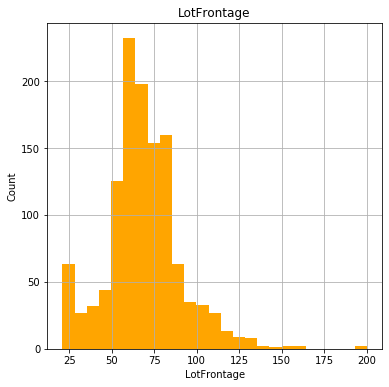

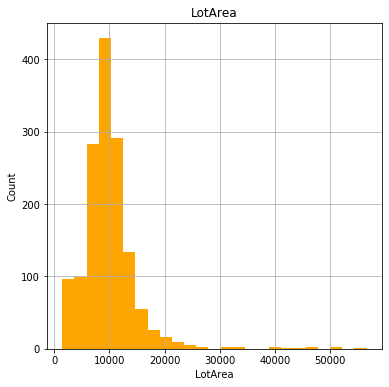

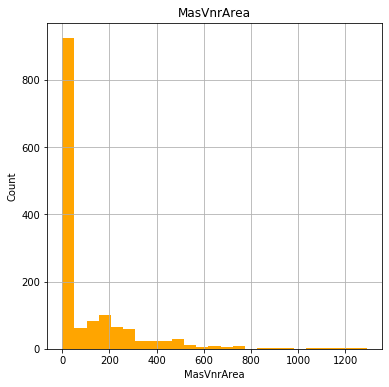

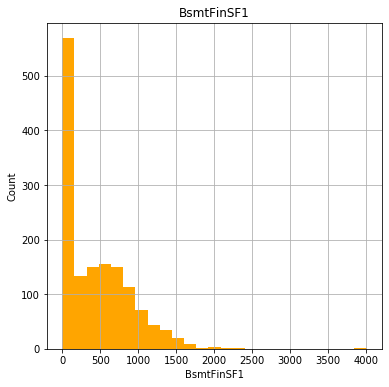

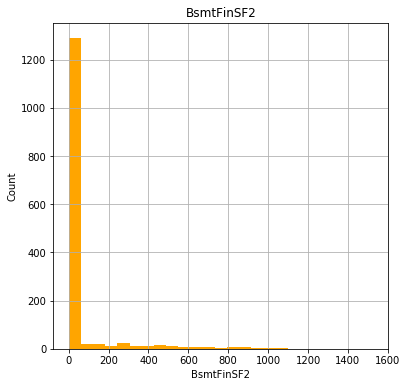

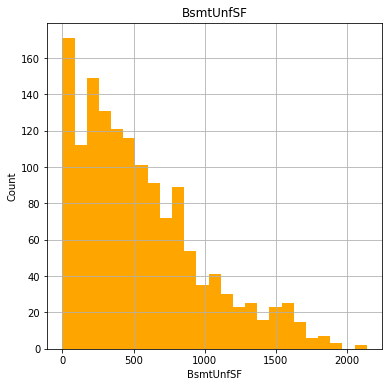

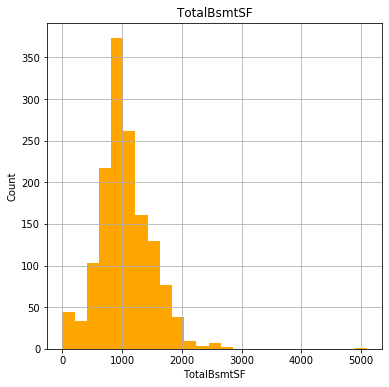

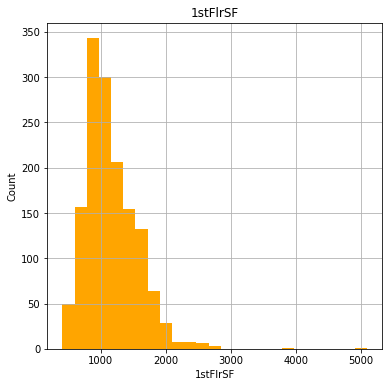

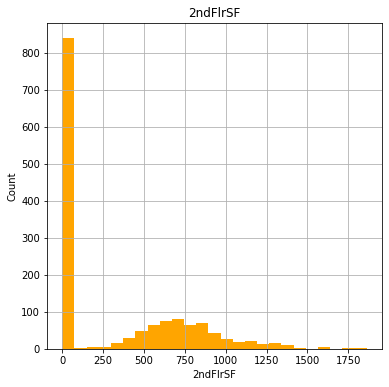

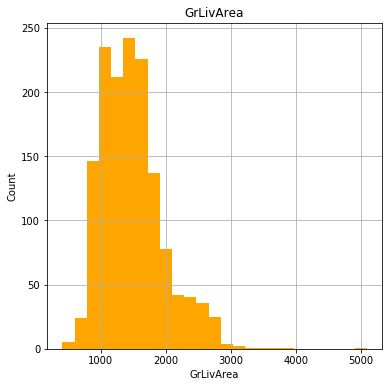

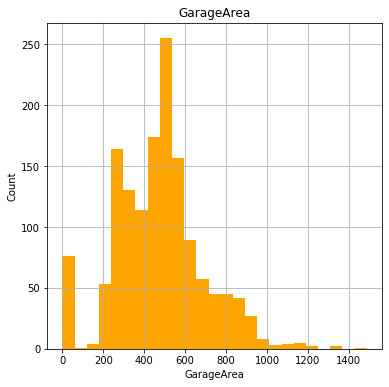

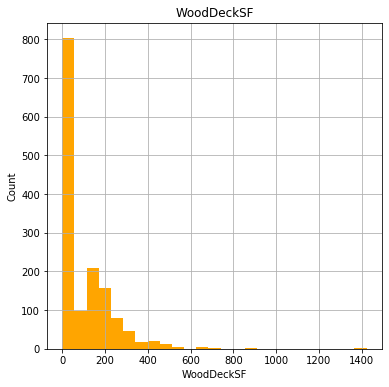

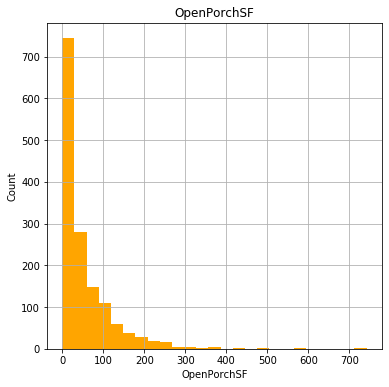

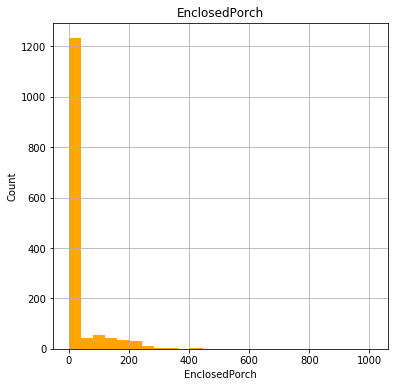

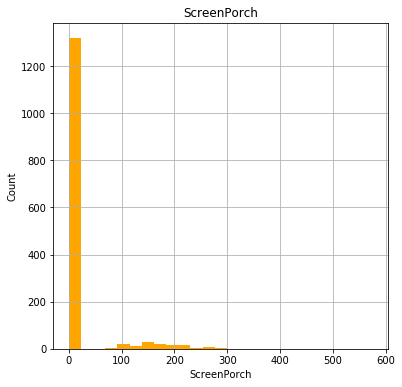

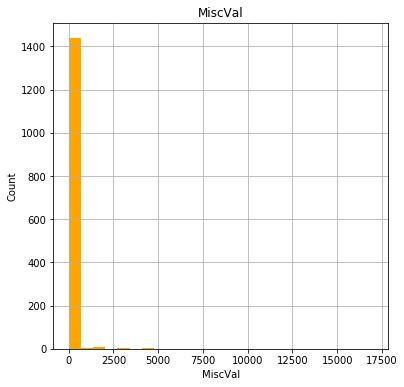

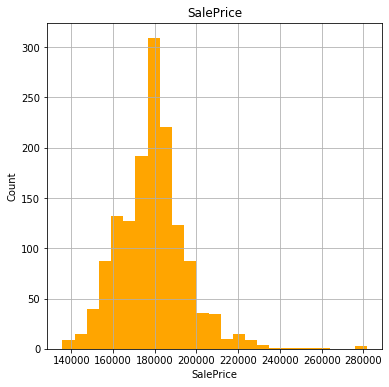

In [20]:
for feature in continuous_features:
    data_copy=data.copy()
    data_copy[feature].hist(bins=25, color="orange")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

From above plots we can easily see that almost all the Continuous Features are Right Skewed except few. But no one is having a normal distribution.<br><br>
So, let's try to scale our Continuous Features to simply make a Log Normal Distribution.

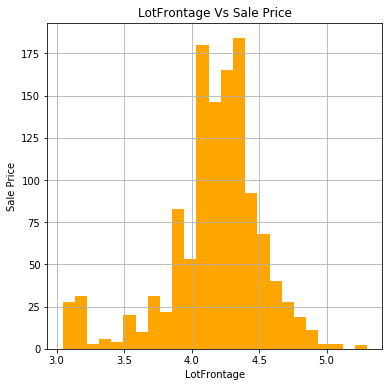

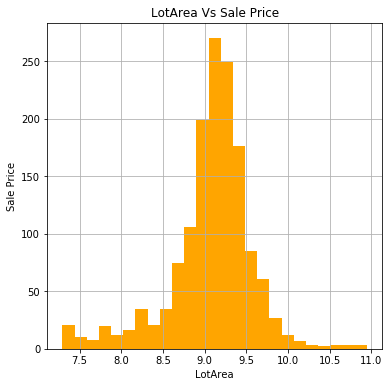

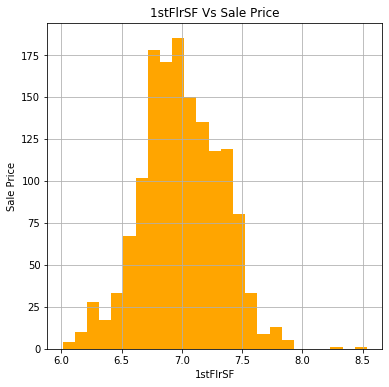

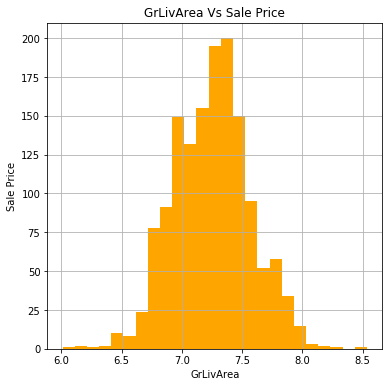

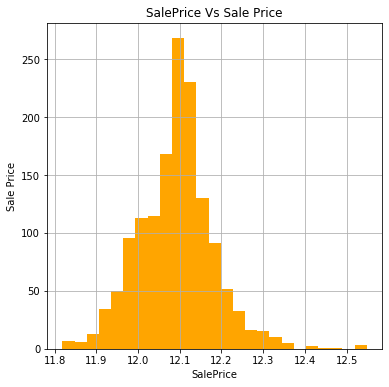

In [21]:
for feature in continuous_features:
    data_copy = data.copy()
    if 0 in data_copy[feature].unique():
        pass
    else:
        data_copy[feature] = np.log(data_copy[feature])
#         data_copy["SalePrice"] = np.log(data_copy["SalePrice"])
        data_copy[feature].hist(bins=25, color="orange")
        plt.xlabel(feature)
        plt.ylabel("Sale Price")
        plt.title("{} Vs Sale Price".format(feature))
        plt.show()

>**Note :-** We skipped the Continuous Features which have 0 as a value in them as log(0) = Undefined.

So, as we can see above now the data is in better shape then before.

## Outliers

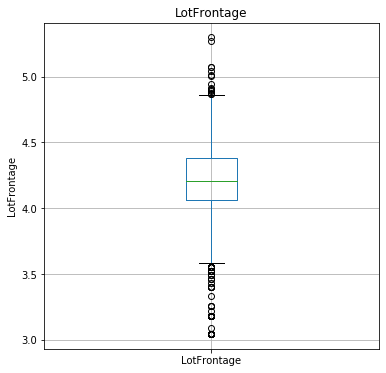

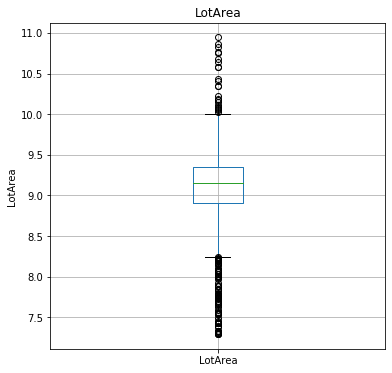

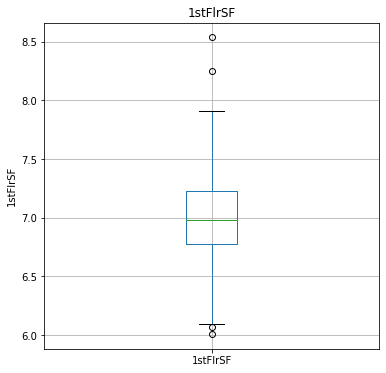

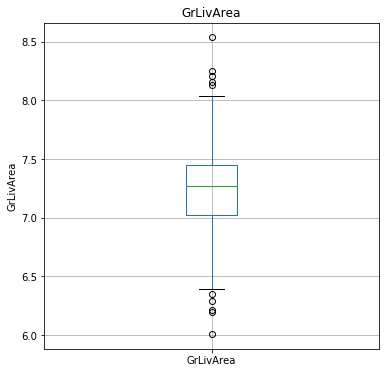

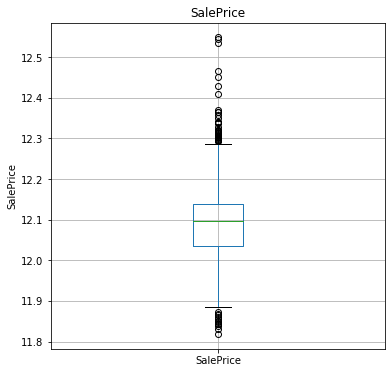

In [22]:
for feature in continuous_features:
    data_copy = data.copy()
    if 0 in data_copy[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

So, as we can see above there are many Outliers in these Continuous Features which are above & below 100 percentile & 0 percentile respectively.

## Categorical Features

In [23]:
categorical_features = [feature for feature in data.columns if data[feature].dtypes == "O"]
print("There are {} Categorical Features".format(len(categorical_features)))
categorical_features

There are 43 Categorical Features


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [24]:
data[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,None,Gd,TA,PConc,Gd,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [25]:
for feature in categorical_features:
    print("There are {} Unique Features in {}".format(len(data[feature].unique()), feature))

There are 6 Unique Features in MSZoning
There are 2 Unique Features in Street
There are 3 Unique Features in Alley
There are 4 Unique Features in LotShape
There are 4 Unique Features in LandContour
There are 2 Unique Features in Utilities
There are 5 Unique Features in LotConfig
There are 3 Unique Features in LandSlope
There are 25 Unique Features in Neighborhood
There are 9 Unique Features in Condition1
There are 5 Unique Features in Condition2
There are 5 Unique Features in BldgType
There are 7 Unique Features in HouseStyle
There are 6 Unique Features in RoofStyle
There are 4 Unique Features in RoofMatl
There are 14 Unique Features in Exterior1st
There are 16 Unique Features in Exterior2nd
There are 5 Unique Features in MasVnrType
There are 4 Unique Features in ExterQual
There are 5 Unique Features in ExterCond
There are 6 Unique Features in Foundation
There are 5 Unique Features in BsmtQual
There are 5 Unique Features in BsmtCond
There are 5 Unique Features in BsmtExposure
There are

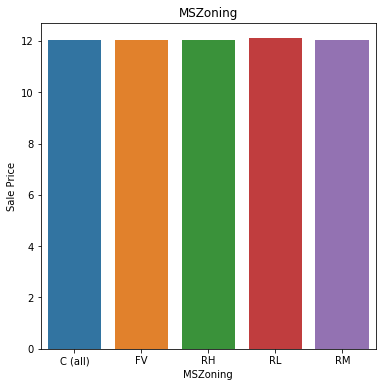

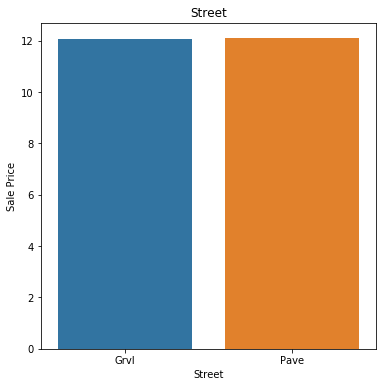

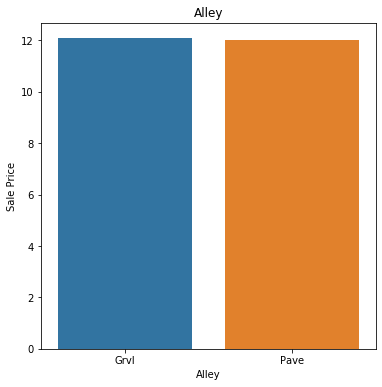

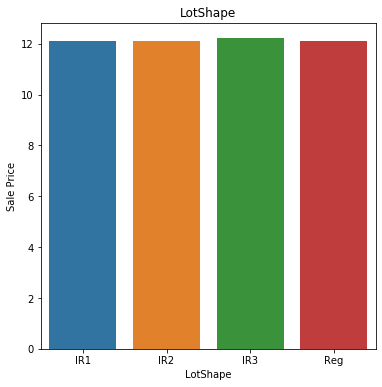

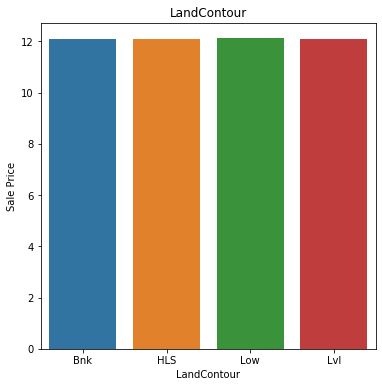

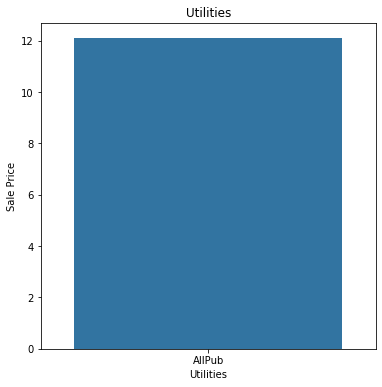

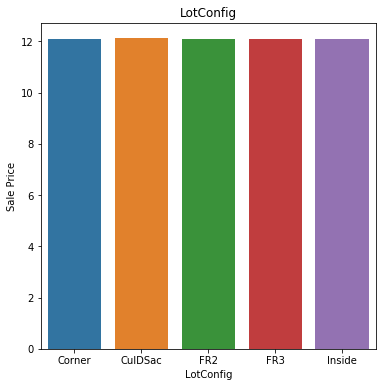

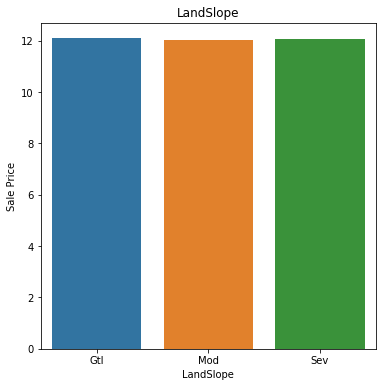

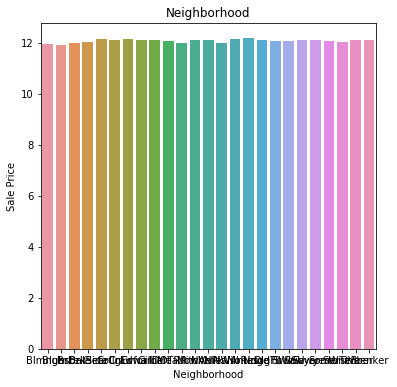

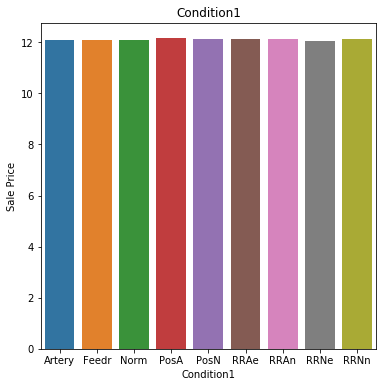

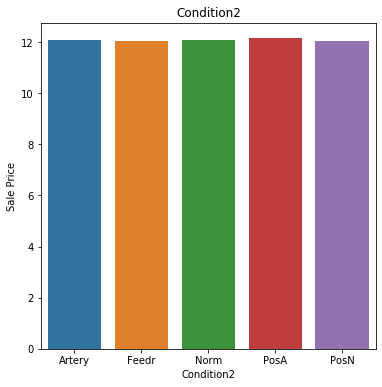

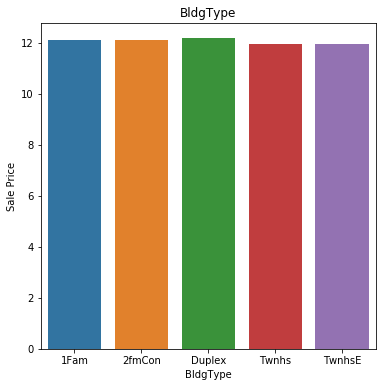

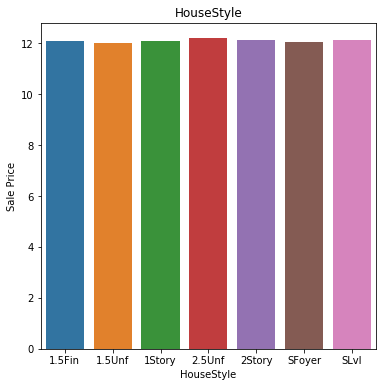

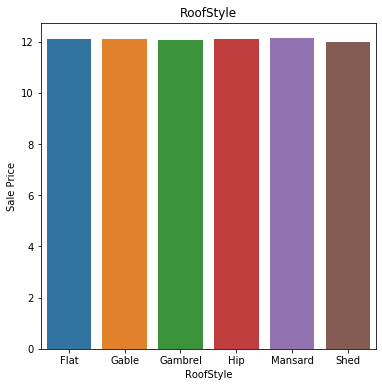

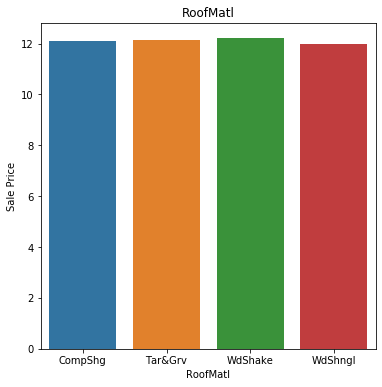

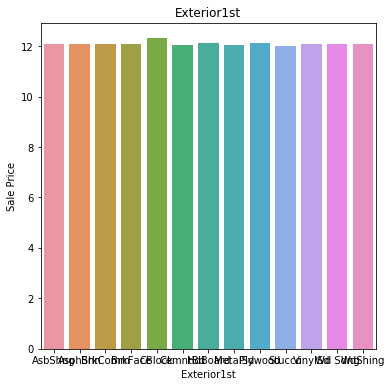

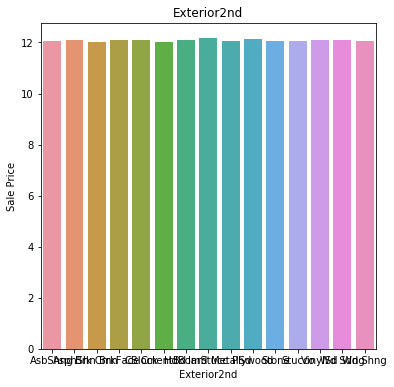

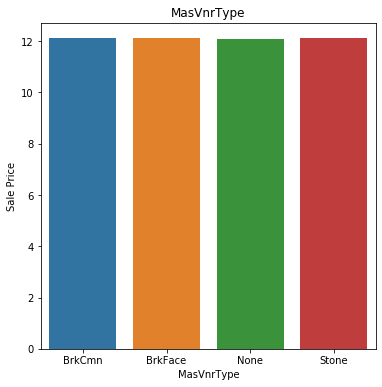

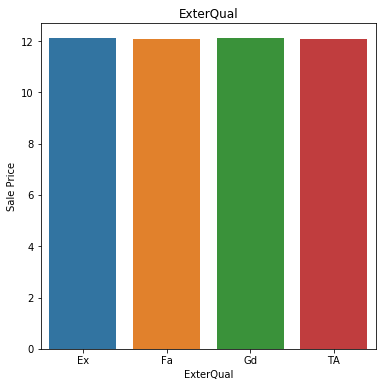

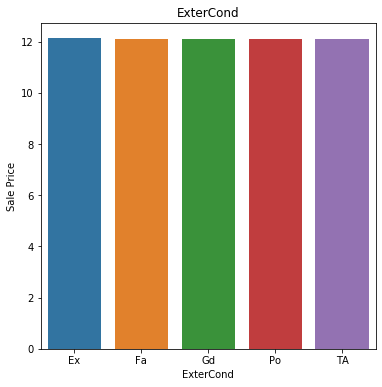

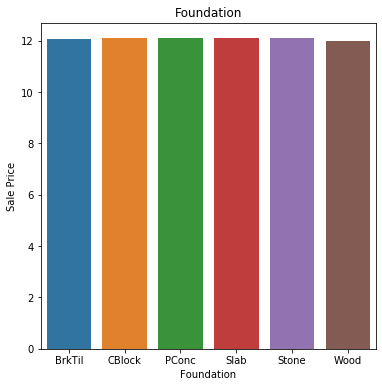

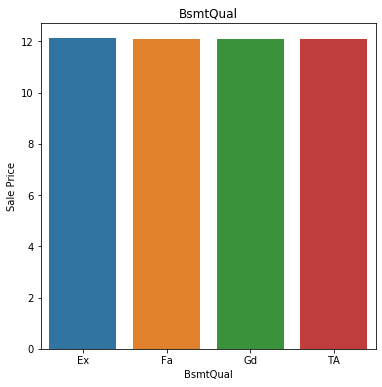

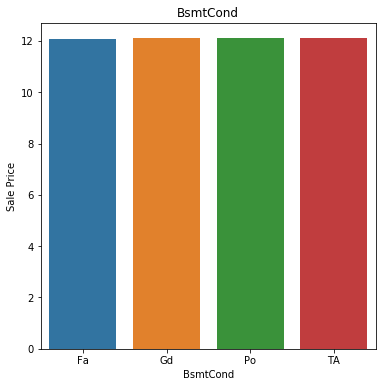

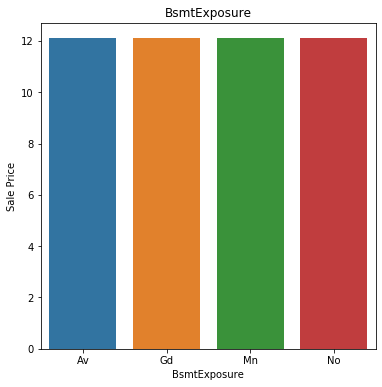

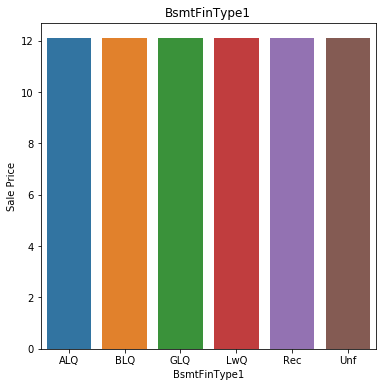

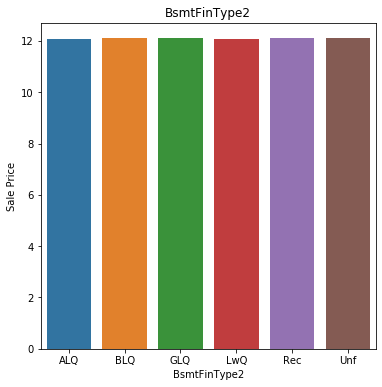

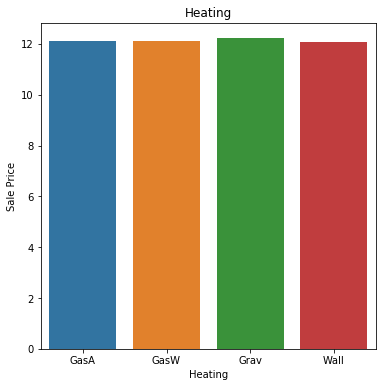

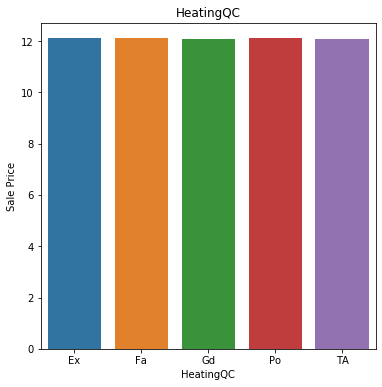

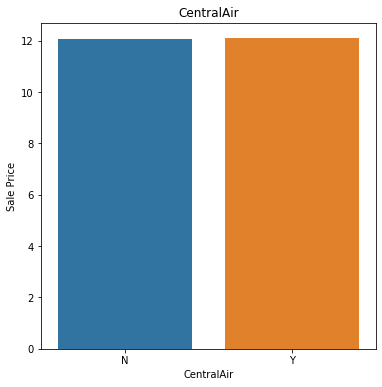

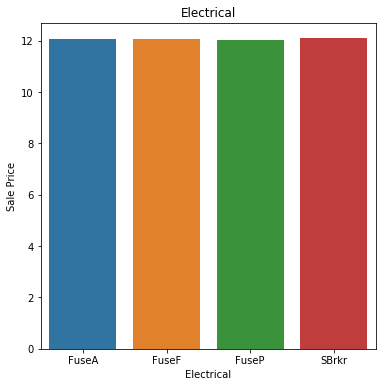

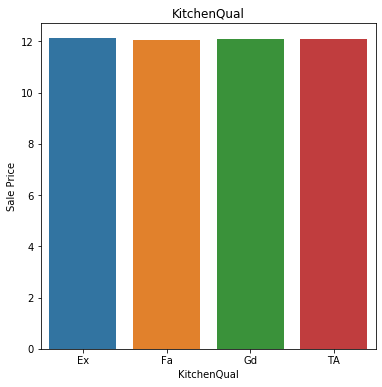

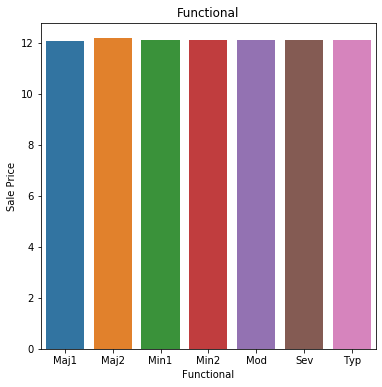

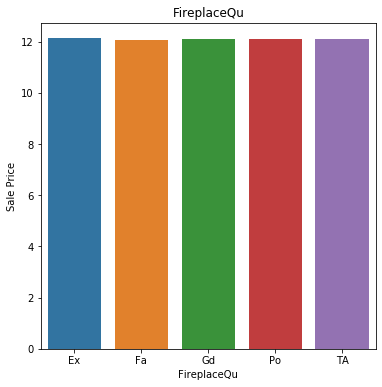

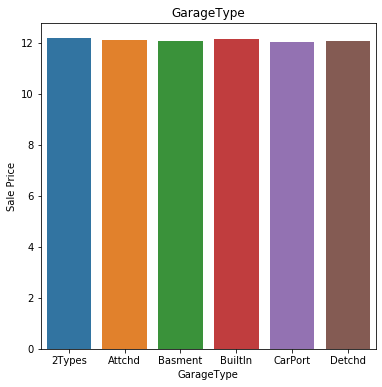

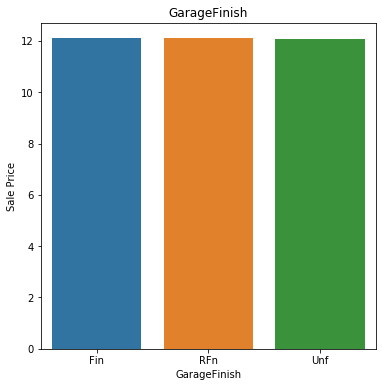

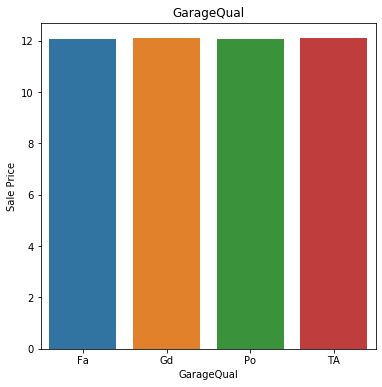

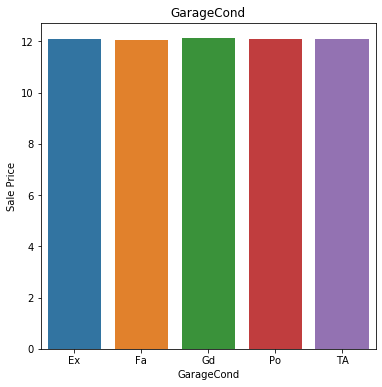

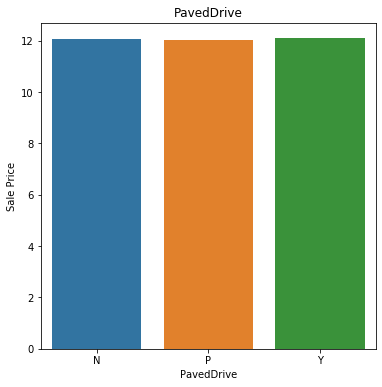

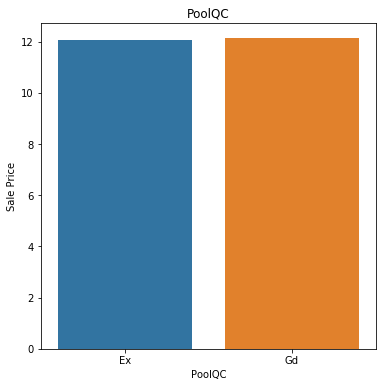

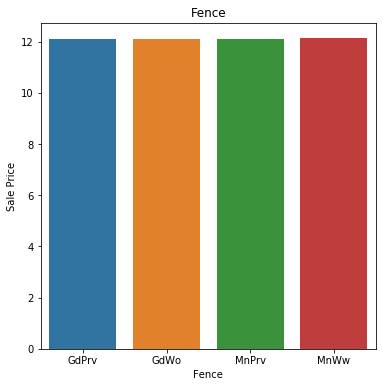

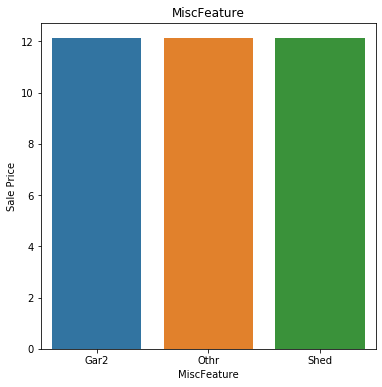

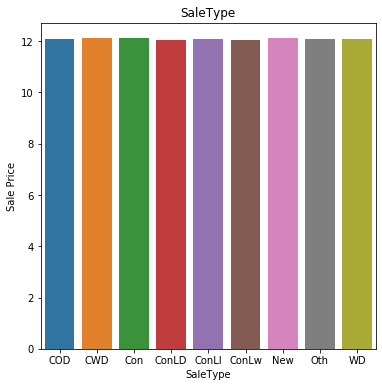

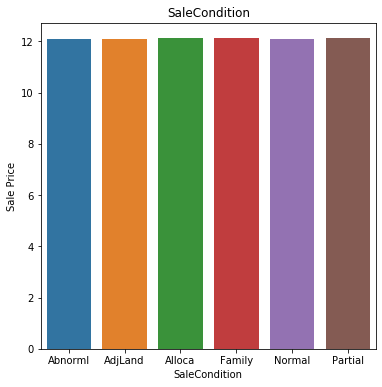

In [26]:
for feature in categorical_features:
    data_copy = data.copy()
    median = data_copy.groupby(feature)["SalePrice"].median()
    sns.barplot(x=median.index, y=median.values)
    plt.ylabel("Sale Price")
    plt.title(feature)
    plt.show()

## Feature Engineering
Now as we are going to start the phase of Feature Engineering. First we will again read data as fresh data becoz earlier during EDA we applied many things. So, will read again data.

In [27]:
data = pd.concat([x_test, y_test["SalePrice"]], axis=1)
print("There are {} rows & {} columns in variable data.".format(data.shape[0], data.shape[1]))
data.head()

There are 1459 rows & 81 columns in variable data.


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.052498
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.393989
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.683570
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.477511
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.079977


## Missing Values
#### Categorical Features

In [28]:
categorical_nan = [feature for feature in categorical_features if data[feature].isnull().sum() >= 1]

for feature in categorical_nan:
    print("Missing values in {} - {} %".format(feature, np.round(data[feature].isnull().mean()*100, 2)))

Missing values in MSZoning - 0.27 %
Missing values in Alley - 92.67 %
Missing values in Utilities - 0.14 %
Missing values in Exterior1st - 0.07 %
Missing values in Exterior2nd - 0.07 %
Missing values in MasVnrType - 1.1 %
Missing values in BsmtQual - 3.02 %
Missing values in BsmtCond - 3.08 %
Missing values in BsmtExposure - 3.02 %
Missing values in BsmtFinType1 - 2.88 %
Missing values in BsmtFinType2 - 2.88 %
Missing values in KitchenQual - 0.07 %
Missing values in Functional - 0.14 %
Missing values in FireplaceQu - 50.03 %
Missing values in GarageType - 5.21 %
Missing values in GarageFinish - 5.35 %
Missing values in GarageQual - 5.35 %
Missing values in GarageCond - 5.35 %
Missing values in PoolQC - 99.79 %
Missing values in Fence - 80.12 %
Missing values in MiscFeature - 96.5 %
Missing values in SaleType - 0.07 %


In [29]:
def fill_nan_cat(data, features):
    data_copy = data.copy()
    data_copy[features] = data[features].fillna("Missing")
    return data_copy

data = fill_nan_cat(data, categorical_nan)
data[categorical_nan].isnull().sum()

MSZoning        0
Alley           0
Utilities       0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
KitchenQual     0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
SaleType        0
dtype: int64

In [30]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Missing,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,Missing,MnPrv,Missing,0,6,2010,WD,Normal,169277.052498
1,1462,20,RL,81.0,14267,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Missing,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,Missing,Missing,Gar2,12500,6,2010,WD,Normal,187758.393989
2,1463,60,RL,74.0,13830,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,Missing,MnPrv,Missing,0,3,2010,WD,Normal,183583.683570
3,1464,60,RL,78.0,9978,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,Missing,Missing,Missing,0,6,2010,WD,Normal,179317.477511
4,1465,120,RL,43.0,5005,Pave,Missing,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Missing,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,Missing,Missing,Missing,0,1,2010,WD,Normal,150730.079977


#### Numerical Features

In [31]:
num_nan = [feature for feature in num_features if data[feature].isnull().sum() >= 1]

for feature in num_nan:
    print("Missing values in {} - {} %".format(feature, np.round(data[feature].isnull().mean()*100, 2)))

Missing values in LotFrontage - 15.56 %
Missing values in MasVnrArea - 1.03 %
Missing values in BsmtFinSF1 - 0.07 %
Missing values in BsmtFinSF2 - 0.07 %
Missing values in BsmtUnfSF - 0.07 %
Missing values in TotalBsmtSF - 0.07 %
Missing values in BsmtFullBath - 0.14 %
Missing values in BsmtHalfBath - 0.14 %
Missing values in GarageYrBlt - 5.35 %
Missing values in GarageCars - 0.07 %
Missing values in GarageArea - 0.07 %


In [32]:
def fill_nan_num(data, feature):
    data_copy = data.copy()
    median = data_copy[feature].median()
    data_copy[feature] = data_copy[feature].fillna(median)
    return data_copy

data = fill_nan_num(data, num_nan)
data[num_nan].isnull().sum()

LotFrontage     0
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
GarageCars      0
GarageArea      0
dtype: int64

#### Temporal Features
As we saw above in EDA that the Temporal Features were storing the Years not the Number Of Years. Also we saw that when we plotted YrSold with SalePrice it showed us a negative relationship between both variables/features but it's not right as the relationship should have been positive to tell us that as the Year increases the Sale Price also goes higher. So, will now change the value of Temoparl Features[YearBuilt, YearRemodAdd, GarageYrBlt] from Years to Number Of Years.

In [33]:
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    data[feature] = data["YrSold"] - data[feature]

data[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,49,49,49.0
1,52,52,52.0
2,13,12,13.0
3,12,12,12.0
4,18,18,18.0


#### Numerical Features
As we saw above that there are 16 Continuous Numerical Features but many of them are Skewed & don't have a Normal Distribution. But we can remove the Skeweness of Features by converting them to Log Normal Distribution using Log of all Values. But this can be done to those specified Features which don't have any 0 as a value in them because log(0) = Undefined. So, will perform Feature Engineering on only those features which don't have 0 as a value in them.

In [34]:
list = []
for feature in continuous_features:
    if 0 in data[feature].unique():
        pass
    else:
        print(feature)
        data[feature] = np.log(data[feature])
        list.append(feature)
data[list].head()

LotFrontage
LotArea
1stFlrSF
GrLivArea
SalePrice


,LotFrontage,LotArea,1stFlrSF,GrLivArea,SalePrice
0,4.382027,9.360655,6.797940,6.797940,12.039292
1,4.394449,9.565704,7.192182,7.192182,12.142911
2,4.304065,9.534595,6.833032,7.395722,12.120426
3,4.356709,9.208138,6.830874,7.380256,12.096913
4,3.761200,8.518193,7.154615,7.154615,11.923246


#### Rare Categorical Features
We will remove categorical variables that are present less than 1% of the observations

In [35]:
for feature in categorical_features:
    temp = data.groupby(feature)["SalePrice"].count() / len(data)  # This will give us %age of each category observations in each feature
    temp_df = temp[temp > 0.01].index
    data[feature] = np.where(data[feature].isin(temp_df), data[feature], "Rare_Var")

data[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,Rare_Var,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,Missing,Attchd,Unf,TA,TA,Y,Missing,MnPrv,Missing,WD,Normal
1,RL,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,Missing,Attchd,Unf,TA,TA,Y,Missing,Missing,Rare_Var,WD,Normal
2,RL,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,Missing,MnPrv,Missing,WD,Normal
3,RL,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,Missing,Missing,Missing,WD,Normal
4,RL,Pave,Missing,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,None,Gd,TA,PConc,Gd,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Missing,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal


Now, everything is good to go for feature scaling except 1 thing. Categorical featuers are yet to be converted to a numerical value. For this first I will take mean Sale Price of each category of each Categorical Feature. Then will sort those categories according to thier meam Sale Price in ascending order & then will exchange each category value with its index number.

In [36]:
for feature in categorical_features:
    cat_ordered = data.groupby([feature])["SalePrice"].mean().sort_values().index
    cat_ordered = {k:i for i,k in enumerate(cat_ordered,0)}
    data[feature] = data[feature].map(cat_ordered)

In [37]:
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,3,4.382027,9.360655,1,2,0,1,0,1,1,8,2,0,2,1,5,6,49,49,0,0,6,8,0,0.0,2,0,3,2,2,1,2,468.0,2,144.0,270.0,882.0,0,1,1,3,6.797940,0,0,6.797940,0.0,0.0,1,0,2,1,3,5,0,0,1,4,49.0,1,1.0,730.0,2,2,2,140,0,0,0,120,0,1,1,0,0,6,2010,2,0,12.039292
1,1462,20,4,4.394449,9.565704,1,2,1,1,0,3,1,8,0,0,2,1,6,6,52,52,2,0,5,6,3,108.0,2,0,3,2,2,1,4,923.0,3,0.0,406.0,1329.0,0,1,1,3,7.192182,0,0,7.192182,0.0,0.0,1,1,3,1,2,6,0,0,1,4,52.0,1,1.0,312.0,2,2,2,393,36,0,0,0,0,1,2,1,12500,6,2010,2,0,12.142911
2,1463,60,4,4.304065,9.534595,1,2,1,1,0,1,1,18,0,0,2,4,5,5,13,12,0,0,6,8,0,0.0,2,0,2,1,2,1,0,791.0,3,0.0,137.0,928.0,0,0,1,3,6.833032,701,0,7.395722,0.0,0.0,2,1,3,1,3,6,0,1,4,4,13.0,3,2.0,482.0,2,2,2,212,34,0,0,0,0,1,1,0,0,3,2010,2,0,12.120426
3,1464,60,4,4.356709,9.208138,1,2,1,1,0,1,1,18,0,0,2,4,6,6,12,12,0,0,6,8,3,20.0,2,0,2,2,2,1,0,602.0,3,0.0,324.0,926.0,0,2,1,3,6.830874,678,0,7.380256,0.0,0.0,2,1,3,1,2,7,0,1,3,4,12.0,3,2.0,470.0,2,2,2,360,36,0,0,0,0,1,2,0,0,6,2010,2,0,12.096913
4,1465,120,4,3.761200,8.518193,1,2,1,0,0,1,1,9,0,0,0,1,8,5,18,18,0,0,7,7,0,0.0,1,0,2,1,2,1,4,263.0,3,0.0,1017.0,1280.0,0,2,1,3,7.154615,0,0,7.154615,0.0,0.0,2,0,2,1,2,5,0,0,1,4,18.0,2,2.0,506.0,2,2,2,0,82,0,0,144,0,1,2,0,0,1,2010,2,0,11.923246
5,1466,60,4,4.317488,9.210340,1,2,1,1,0,3,1,18,0,0,2,4,6,5,17,16,0,0,7,7,0,0.0,2,0,2,1,2,1,5,0.0,3,0.0,763.0,763.0,0,0,1,3,6.637258,892,0,7.411556,0.0,0.0,2,1,3,1,3,7,0,1,4,4,17.0,3,2.0,440.0,2,2,2,157,84,0,0,0,0,1,2,0,0,4,2010,2,0,12.084758
6,1467,20,4,4.204693,8.984694,1,2,1,1,0,1,1,18,0,0,2,1,6,7,18,3,0,0,7,7,0,0.0,2,1,2,1,2,1,4,935.0,3,0.0,233.0,1168.0,0,2,1,3,7.079184,0,0,7.079184,1.0,0.0,2,0,3,1,3,6,0,0,1,4,18.0,3,2.0,420.0,2,2,2,483,21,0,0,0,0,1,3,2,500,3,2010,2,0,12.055660
7,1468,60,4,4.143135,9.036225,1,2,1,1,0,1,1,18,0,0,2,4,6,5,12,12,0,0,6,8,0,0.0,2,0,2,1,2,1,5,0.0,3,0.0,789.0,789.0,0,0,1,3,6.670766,676,0,7.289611,0.0,0.0,2,1,3,1,3,7,0,1,3,4,12.0,3,2.0,393.0,2,2,2,0,75,0,0,0,0,1,2,0,0,5,2010,2,0,12.073175
8,1469,20,4,4.442651,9.227787,1,2,0,1,0,1,1,18,0,0,2,1,7,5,20,20,0,0,7,7,0,0.0,2,0,2,1,2,2,0,637.0,3,0.0,663.0,1300.0,0,0,1,3,7.201171,0,0,7.201171,1.0,0.0,1,1,2,1,2,5,0,1,2,4,20.0,1,2.0,506.0,2,2,2,192,0,0,0,0,0,1,2,0,0,2,2010,2,0,11.995424
9,1470,20,4,4.248495,9.035987,1,2,0,1,0,3,1,8,0,0,2,1,4,5,40,40,0,0,8,11,0,0.0,2,0,3,2,2,1,4,804.0,5,78.0,0.0,882.0,0,1,1,3,6.782192,0,0,6.782192,1.0,0.0,1,0,2,1,3,4,0,0,1,4,40.0,3,2.0,525.0,2,2,2,240,0,0,0,0,0,1,1,0,0,4,2010,2,0,11.987458


## Feature Scaling

In [38]:
from sklearn.preprocessing import MinMaxScaler

feature_to_scale = [feature for feature in data.columns if feature not in ["Id", "SalePrice"]]

scalar = MinMaxScaler()
scalar.fit(data[feature_to_scale])

# Making a new Data-Frame
scaled_data = pd.concat([data[["Id", "SalePrice"]].reset_index(drop=True),
                            pd.DataFrame(scalar.transform(data[feature_to_scale]), columns=feature_to_scale)], axis=1)
scaled_data.head(8)

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,12.039292,0.000000,0.75,0.593445,0.566360,1.0,1.0,0.000000,0.333333,0.0,0.25,0.5,0.40,0.333333,0.0,0.5,0.2,0.444444,0.625,0.384615,0.822581,0.0,0.0,0.6,0.727273,0.00,0.000000,0.666667,0.000000,0.75,0.50,0.5,0.25,0.333333,0.116708,0.333333,0.094364,0.126168,0.173111,0.0,0.25,1.0,1.0,0.312253,0.000000,0.0,0.312253,0.000000,0.0,0.25,0.0,0.333333,0.5,0.75,0.166667,0.0,0.00,0.2,0.666667,0.792994,0.333333,0.2,0.490591,0.666667,0.666667,1.0,0.098315,0.000000,0.0,0.0,0.208333,0.0,1.0,0.25,0.0,0.000000,0.454545,1.0,0.5,0.0
1,1462,12.142911,0.000000,1.00,0.598957,0.622527,1.0,1.0,0.333333,0.333333,0.0,0.75,0.5,0.40,0.000000,0.0,0.5,0.2,0.555556,0.625,0.407692,0.870968,1.0,0.0,0.5,0.545455,0.75,0.083721,0.666667,0.000000,0.75,0.50,0.5,0.25,0.666667,0.230175,0.500000,0.000000,0.189720,0.260844,0.0,0.25,1.0,1.0,0.468253,0.000000,0.0,0.468253,0.000000,0.0,0.25,0.5,0.500000,0.5,0.50,0.250000,0.0,0.00,0.2,0.666667,0.802548,0.333333,0.2,0.209677,0.666667,0.666667,1.0,0.275983,0.048518,0.0,0.0,0.000000,0.0,1.0,0.50,0.5,0.735294,0.454545,1.0,0.5,0.0
2,1463,12.120426,0.235294,1.00,0.558854,0.614005,1.0,1.0,0.333333,0.333333,0.0,0.25,0.5,0.90,0.000000,0.0,0.5,0.8,0.444444,0.500,0.107692,0.225806,0.0,0.0,0.6,0.727273,0.00,0.000000,0.666667,0.000000,0.50,0.25,0.5,0.25,0.000000,0.197257,0.500000,0.000000,0.064019,0.182139,0.0,0.00,1.0,1.0,0.326139,0.376477,0.0,0.548792,0.000000,0.0,0.50,0.5,0.500000,0.5,0.75,0.250000,0.0,0.25,0.8,0.666667,0.678344,1.000000,0.4,0.323925,0.666667,0.666667,1.0,0.148876,0.045822,0.0,0.0,0.000000,0.0,1.0,0.25,0.0,0.000000,0.181818,1.0,0.5,0.0
3,1464,12.096913,0.235294,1.00,0.582212,0.524583,1.0,1.0,0.333333,0.333333,0.0,0.25,0.5,0.90,0.000000,0.0,0.5,0.8,0.555556,0.625,0.100000,0.225806,0.0,0.0,0.6,0.727273,0.75,0.015504,0.666667,0.000000,0.50,0.50,0.5,0.25,0.000000,0.150125,0.500000,0.000000,0.151402,0.181747,0.0,0.50,1.0,1.0,0.325285,0.364125,0.0,0.542672,0.000000,0.0,0.50,0.5,0.500000,0.5,0.50,0.333333,0.0,0.25,0.6,0.666667,0.675159,1.000000,0.4,0.315860,0.666667,0.666667,1.0,0.252809,0.048518,0.0,0.0,0.000000,0.0,1.0,0.50,0.0,0.000000,0.454545,1.0,0.5,0.0
4,1465,11.923246,0.588235,1.00,0.317987,0.335596,1.0,1.0,0.333333,0.000000,0.0,0.25,0.5,0.45,0.000000,0.0,0.0,0.2,0.777778,0.500,0.146154,0.322581,0.0,0.0,0.7,0.636364,0.00,0.000000,0.333333,0.000000,0.50,0.25,0.5,0.25,0.666667,0.065586,0.500000,0.000000,0.475234,0.251227,0.0,0.50,1.0,1.0,0.453388,0.000000,0.0,0.453388,0.000000,0.0,0.50,0.0,0.333333,0.5,0.50,0.166667,0.0,0.00,0.2,0.666667,0.694268,0.666667,0.4,0.340054,0.666667,0.666667,1.0,0.000000,0.110512,0.0,0.0,0.250000,0.0,1.0,0.50,0.0,0.000000,0.000000,1.0,0.5,0.0
5,1466,12.084758,0.235294,1.00,0.564810,0.525186,1.0,1.0,0.333333,0.333333,0.0,0.75,0.5,0.90,0.000000,0.0,0.5,0.8,0.555556,0.500,0.138462,0.290323,0.0,0.0,0.7,0.636364,0.00,0.000000,0.666667,0.000000,0.50,0.25,0.5,0.25,0.833333,0.000000,0.500000,0.000000,0.356542,0.149755,0.0,0.00,1.0,1.0,0.248672,0.479055,0.0,0.555058,0.000000,0.0,0.50,0.5,0.500000,0.5,0.75,0.333333,0.0,0.25,0.8,0.666667,0.691083,1.000000,0.4,0.295699,0.666667,0.666667,1.0,0.110253,0.113208,0.0,0.0,0.000000,0.0,1.0,0.50,0.0,0.000000,0.2

In [39]:
scaled_data.to_csv("Feature_Eng_Test.csv", index=False)